# Import Library

In [68]:
# file directory manager
import os
import shutil
import pickle
from google.colab import files 

# data process
import numpy as np
import pandas as pd

# tensorflow utils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# image processing
from PIL import Image
import cv2

# model evaluating
from sklearn.metrics import confusion_matrix, classification_report

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [69]:
# mount drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gathering Data
Skip this step if you already have the final data

**Jump over modelling step**

In [70]:
shutil.rmtree('data', ignore_errors=True)

In [71]:
! mkdir data

## Download Dataset from Kaggle

In [72]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Initialize Kaggle

In [73]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

### Download shayanriyaz Dataset
Classes (train:val) : BrownSpot (418:105), Healthy (1191:297), Hispa (452:113), LeafBlast (623:156)

In [74]:
! kaggle datasets download -d shayanriyaz/riceleafs
! mkdir data/shayanriyaz
! unzip riceleafs.zip -d data/shayanriyaz
os.remove('riceleafs.zip')

Streaming output truncated to the last 5000 lines.
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144631.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144637.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144641.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144645.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144647.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144651.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144654.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144656.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144658.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144730.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144733.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144738.jpg  
  inflating: 

### Download chandrug Dataset
Classes : Leaf smut (40), Brown spot (40), Blast (80), Blight (80), Tungro (80)

In [75]:
! kaggle datasets download -d chandrug/riceleafdisease
! mkdir data/chandrug
! unzip riceleafdisease.zip -d data/chandrug
os.remove('riceleafdisease.zip')

 74% 31.0M/41.8M [00:01<00:00, 17.2MB/s]
100% 41.8M/41.8M [00:01<00:00, 26.2MB/s]
Archive:  riceleafdisease.zip
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_0.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_1.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_10.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_11.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_12.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_13.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_14.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_15.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_16.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_17.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_18.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spo

### Download tedisetiady Dataset
Classes : Blast (80), Blight (80), Tungro (80)

In [76]:
! kaggle datasets download -d tedisetiady/leaf-rice-disease-indonesia
! mkdir data/tedisetiady
! unzip leaf-rice-disease-indonesia.zip -d data/tedisetiady
os.remove('leaf-rice-disease-indonesia.zip')

 79% 17.0M/21.6M [00:01<00:00, 13.0MB/s]
100% 21.6M/21.6M [00:01<00:00, 14.4MB/s]
Archive:  leaf-rice-disease-indonesia.zip
  inflating: data/tedisetiady/blast/IMG_0448.jpg  
  inflating: data/tedisetiady/blast/IMG_0535.jpg  
  inflating: data/tedisetiady/blast/IMG_0536.jpg  
  inflating: data/tedisetiady/blast/IMG_0541.jpg  
  inflating: data/tedisetiady/blast/IMG_0543.jpg  
  inflating: data/tedisetiady/blast/IMG_0544.jpg  
  inflating: data/tedisetiady/blast/IMG_0545.jpg  
  inflating: data/tedisetiady/blast/IMG_0546.jpg  
  inflating: data/tedisetiady/blast/IMG_0547.jpg  
  inflating: data/tedisetiady/blast/IMG_0548.jpg  
  inflating: data/tedisetiady/blast/IMG_0549.jpg  
  inflating: data/tedisetiady/blast/IMG_0550.jpg  
  inflating: data/tedisetiady/blast/IMG_0551.jpg  
  inflating: data/tedisetiady/blast/IMG_0553.jpg  
  inflating: data/tedisetiady/blast/IMG_0557.jpg  
  inflating: data/tedisetiady/blast/IMG_0558.jpg  
  inflating: data/tedisetiady/blast/IMG_0559.jpg  
  inflati

### Download vbookshelf Dataset
Classes : Leaf smut (40), Brown spot (40), Blight (40)

In [77]:
! kaggle datasets download -d vbookshelf/rice-leaf-diseases
! mkdir data/vbookshelf
! unzip rice-leaf-diseases.zip -d data/vbookshelf
os.remove('rice-leaf-diseases.zip')

 25% 9.00M/36.7M [00:01<00:04, 6.02MB/s]
100% 36.7M/36.7M [00:01<00:00, 26.0MB/s]
Archive:  rice-leaf-diseases.zip
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0376.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: data/vbookshelf/rice_l

## Mixed Dataset

In [78]:
diseases = ("LeafSmut", "BrownSpot", "Blight", "Blast", "Tungro", "Hispa", "Healthy")
dataset_dir = 'data/mixed'
alldata_dir = 'data/mixed/alldata'

In [79]:
os.mkdir(dataset_dir)
os.mkdir(alldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(alldata_dir, disease))

In [80]:
def copy_to_mixed_dataset(base_source_dir, source_list, target_list):
  for index, value in enumerate(source_list):
    dest_dir = os.path.join(alldata_dir, target_list[index])
    source_dir = os.path.join(base_source_dir, source_list[index])
    list_data = os.listdir(source_dir)

    for data in list_data:
      if data in os.listdir(dest_dir):
        continue
      source = os.path.join(source_dir, data)
      dest = os.path.join(dest_dir, data)
      shutil.copy(source, dest)

### Copy shayanriyaz Dataset

#### train dir

In [81]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/train'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [82]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [83]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

#### val dir

In [84]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/validation'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [85]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [86]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy chandrug Dataset

In [87]:
base_source_dir = 'data/chandrug/rice-leaf-disease'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Brown spot', 'Leaf smut', 'blast', 'blight', 'tungro']


In [88]:
target_list = ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']


In [89]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy tedisetiady Dataset

In [90]:
base_source_dir = 'data/tedisetiady/'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['blast', 'blight', 'tungro']


In [91]:
target_list = ['Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['Blast', 'Blight', 'Tungro']


In [92]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy vbookshelf Dataset

In [93]:
base_source_dir = 'data/vbookshelf/rice_leaf_diseases'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [94]:
target_list = ['Blight', 'BrownSpot', 'LeafSmut']
print("Directory destination :", target_list)

Directory destination : ['Blight', 'BrownSpot', 'LeafSmut']


In [95]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

## Result Mixed Dataset

In [96]:
print("Total data from each class disease:")
for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  print('{}: {} images'.format(disease, len(list_file)))

Total data from each class disease:
LeafSmut: 80 images
BrownSpot: 603 images
Blight: 200 images
Blast: 939 images
Tungro: 160 images
Hispa: 565 images
Healthy: 1488 images


# Exploratory Data Analysis

show the data distribution

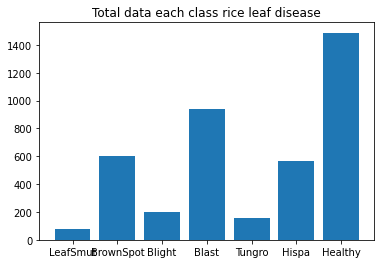

In [97]:
dict_diseases = {}

for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  dict_diseases[disease] = len(list_file)

plt.figure(figsize=(6,4))
plt.bar(x=dict_diseases.keys(), height=dict_diseases.values())
plt.title("Total data each class rice leaf disease")
plt.show()

show example image


Blight


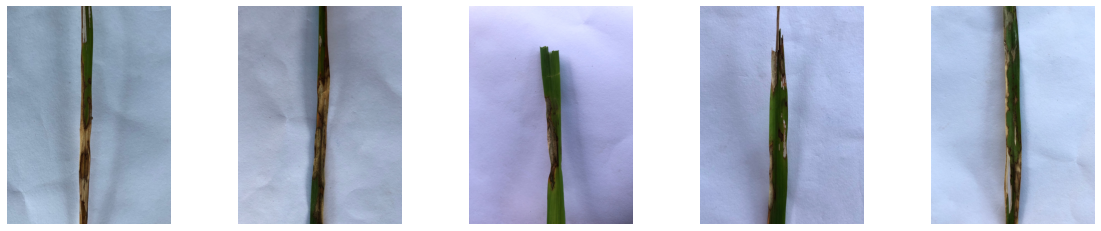


LeafSmut


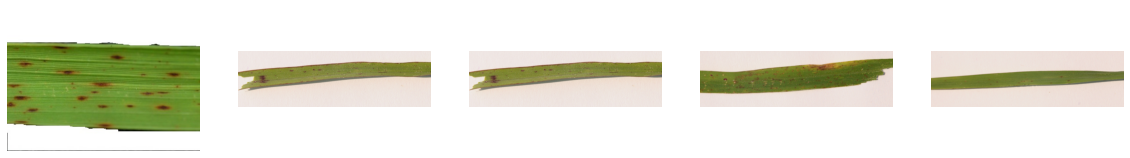


Tungro


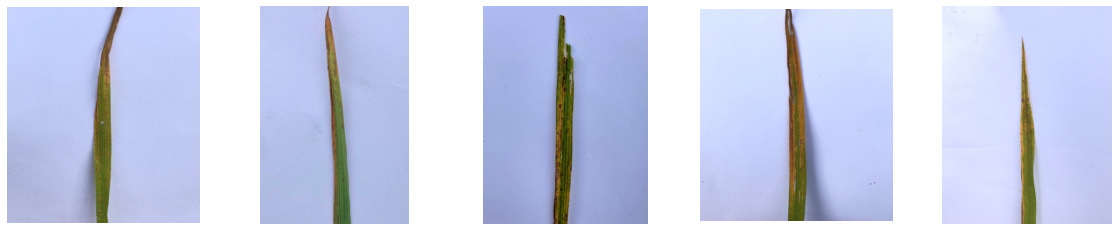


Blast


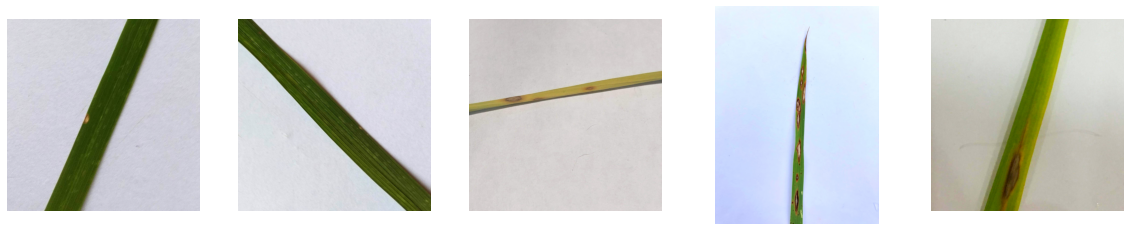


BrownSpot


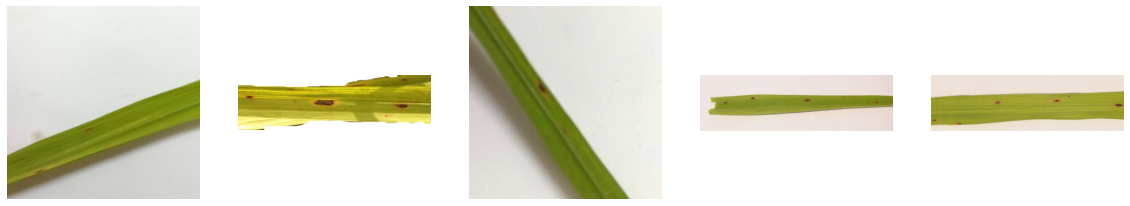


Healthy


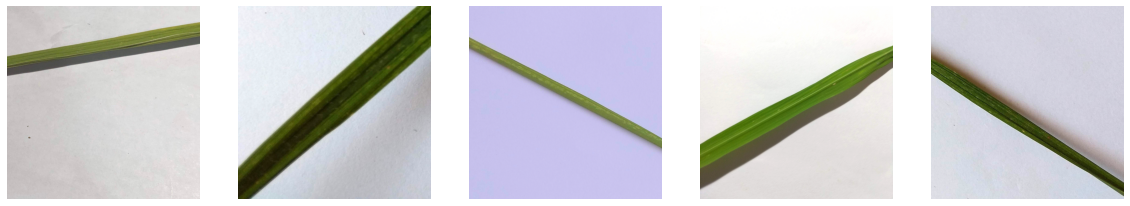


Hispa


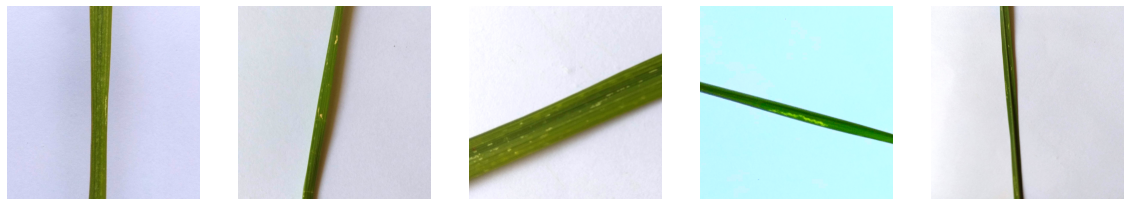

In [98]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(alldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

show minimum and maximum image dimension each class

In [99]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  dir = os.path.join(alldata_dir, item)
  print(item)
  
  max_h, min_h, max_w, min_w = 0, 99999, 0, 99999

  for img_name in os.listdir(dir):
    img_path = os.path.join(dir, img_name)
    img = Image.open(img_path)
    
    w, h = img.size
    if w > max_w: max_w = w
    if w < min_w: min_w = w
    if h > max_h: max_h = h
    if h < min_h: min_h = h
  
  print("min width: {} , max width: {}".format(min_w, max_w))
  print("min height: {} , max height: {}".format(min_h, max_h))
  print("")

Blight
min width: 1291 , max width: 3081
min height: 897 , max height: 1920

LeafSmut
min width: 250 , max width: 4160
min height: 71 , max height: 2340

Tungro
min width: 1313 , max width: 1970
min height: 1920 , max height: 1920

Blast
min width: 734 , max width: 3120
min height: 734 , max height: 3120

BrownSpot
min width: 286 , max width: 3120
min height: 88 , max height: 3120

Healthy
min width: 826 , max width: 3120
min height: 826 , max height: 3120

Hispa
min width: 877 , max width: 3120
min height: 877 , max height: 3120



**Conclusion:**

data must be reproduced and resized for better data distribution

# Data Preprocessing & Augmentation

## Load image array and preprocessing image

In [100]:
def contrast(img):
  """
  increase contrast image
  """
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

  l, a, b = cv2.split(lab)

  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl = clahe.apply(l)
  limg = cv2.merge((cl,a,b))

  enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
  return enhanced_img

def image_pixel_normalization(image):
  """
  transform image to same size without cropping the image
  e.g. image size : (200, 600) => (600, 600)
  """
  h, w, _ = image.shape

  norm_size = h if h > w else w
  
  add_h = norm_size - h
  add_w = norm_size - w 
  
  start_add_h = add_h // 2
  start_add_w = add_w // 2

  new_img = np.full((norm_size, norm_size, 3), 255, dtype=np.uint8)
  new_img[start_add_h:start_add_h + h, start_add_w:start_add_w + w, :] = image
  
  return new_img

def preprocessing(image):
  """
  preprocessing image including size normalization and resize image
  """
  img = image_pixel_normalization(image)
  img = cv2.resize(img, (400, 400))
  # img = contrast(img)
  return np.array(img)

In [101]:
def load_image_array(alldata_dir, disease):
  temp_dis_dir = os.path.join(alldata_dir, disease)
  temp_files = os.listdir(temp_dis_dir)
  temp_paths = [os.path.join(temp_dis_dir, file) for file in temp_files]
  temp_imgs = [read_image(file) for file in temp_paths]

  return np.array(temp_imgs)

def read_image(image_file):
  img = mpimg.imread(image_file)
  img = preprocessing(img)
  return np.array(img)

In [102]:
disease_imgs = {}

for disease in diseases:
  disease_imgs[disease] = load_image_array(alldata_dir, disease)
  print(disease, "done") 

disease_imgs.keys()

LeafSmut done
BrownSpot done
Blight done
Blast done
Tungro done
Hispa done
Healthy done


dict_keys(['LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy'])

In [103]:
disease_imgs['LeafSmut'].shape

(80, 400, 400, 3)


LeafSmut


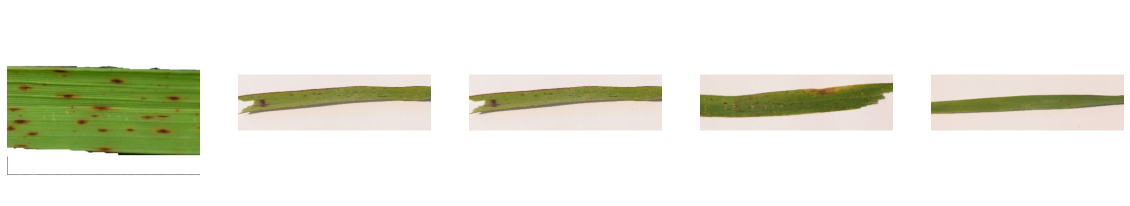


BrownSpot


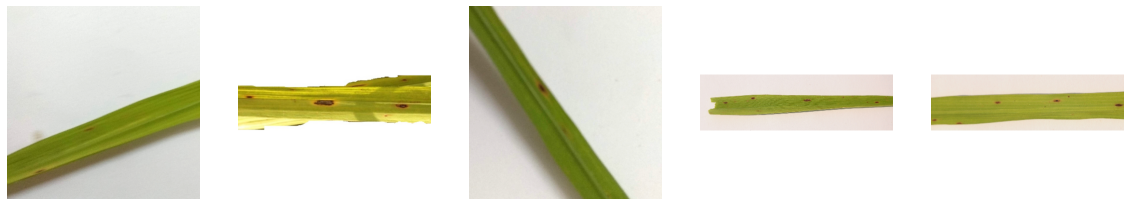


Blight


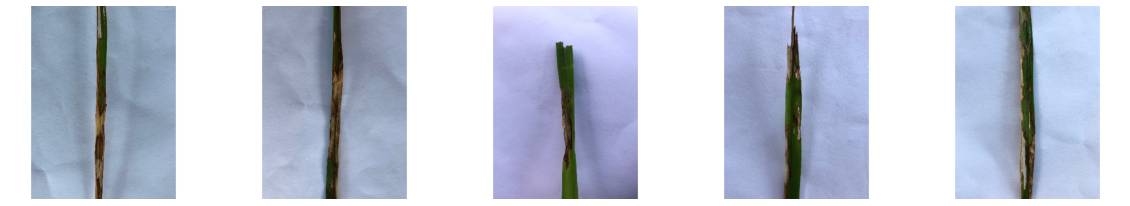


Blast


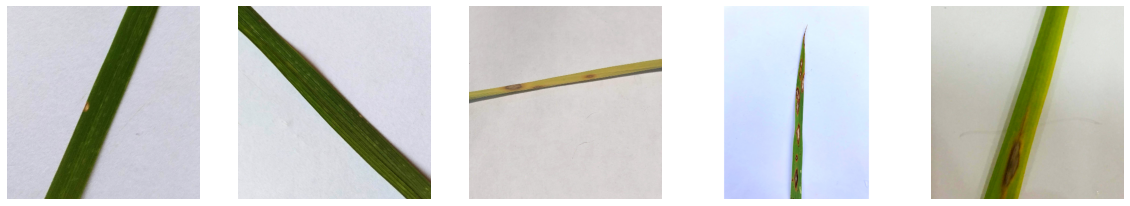


Tungro


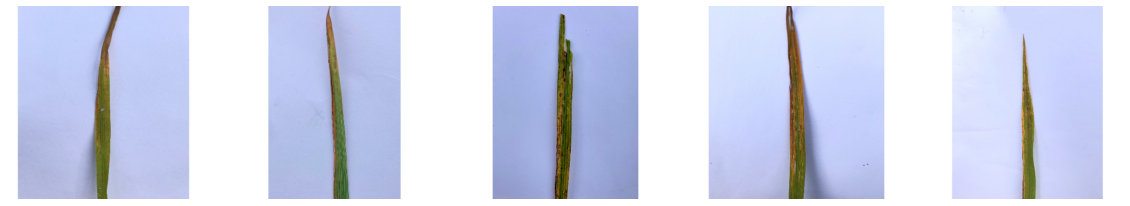


Hispa


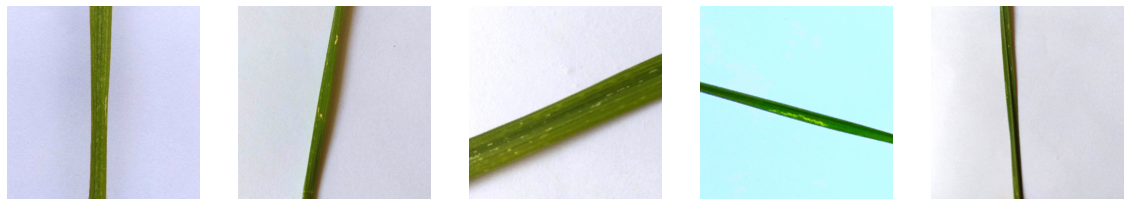


Healthy


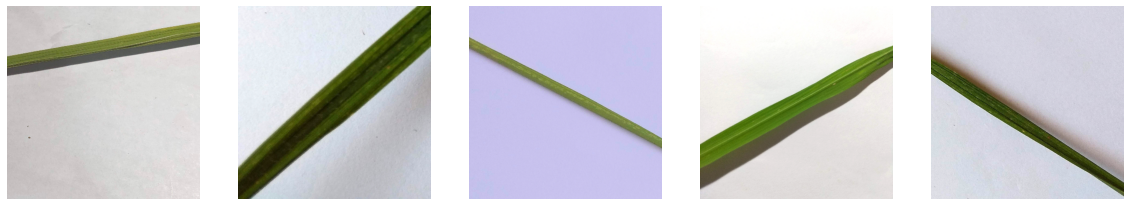

In [104]:
list_data_class = disease_imgs.keys()
for item in list_data_class:
  print("")
  print(item)
  class_images = disease_imgs[item]
  plt.figure(figsize=(20, 4))
  for i, img in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
  plt.show()

## Augmentating image

In [105]:
shutil.rmtree('data/mixed/finaldata', ignore_errors=True)

In [106]:
# final data dir
finaldata_dir = "data/mixed/finaldata"

In [107]:
os.mkdir(finaldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(finaldata_dir, disease))

### Initialized Image Data Generator Augmentation

In [108]:
datagen = ImageDataGenerator(
            rotation_range=20, # rotation
            width_shift_range=0.15, # horizontal shift
            height_shift_range=0.15, # vertical shift
            zoom_range=0.1, # zoom
            horizontal_flip=True, # horizontal flip
            vertical_flip=True, # vertical flip
            brightness_range=[0.8,1.2], # brightness
          )

def generate_image(datagen, data, amount, savepath=None):
  # prepare iterator
  it = datagen.flow(
        data, 
        batch_size=1, 
        save_to_dir=savepath,
        save_prefix='',
        save_format='png',
      )
  
  # generate samples and plot
  for i in range(amount):
    it.next()

### Iterate all class diseases and generate new 1000 image data each class

In [109]:
diseases

('LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy')

In [110]:
amount = 1000

for idx, disease in enumerate(diseases):
  save_path = os.path.join(finaldata_dir, disease)
  generate_image(datagen, disease_imgs[disease], amount, save_path)
  print("{} (done) : {}".format(disease, len(os.listdir(save_path))))

LeafSmut (done) : 998
BrownSpot (done) : 1000
Blight (done) : 1000
Blast (done) : 1000
Tungro (done) : 999
Hispa (done) : 1000
Healthy (done) : 1000


In [ ]:
!zip -r finaldata.zip data/mixed/finaldata

In [114]:
os.remove('/content/drive/Shareddrives/Tanamin Team/Machine Learning/datasets/rice/finaldata.zip')
shutil.move("/content/finaldata.zip", "/content/drive/Shareddrives/Tanamin Team/Machine Learning/datasets/rice") 

'/content/drive/Shareddrives/Tanamin Team/Machine Learning/datasets/rice/finaldata.zip'

show result augmented image


Blight


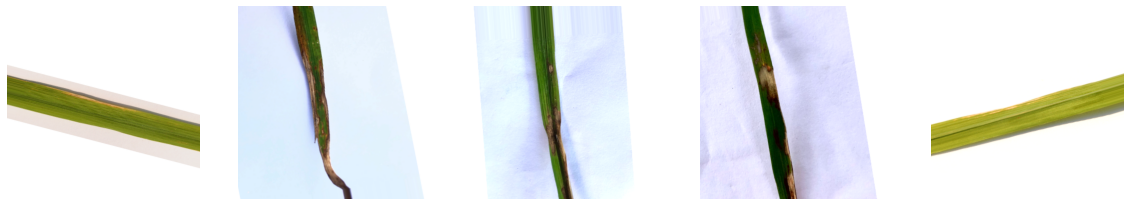


LeafSmut


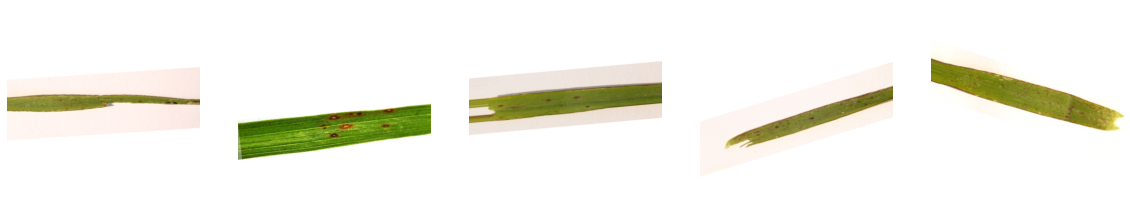


Tungro


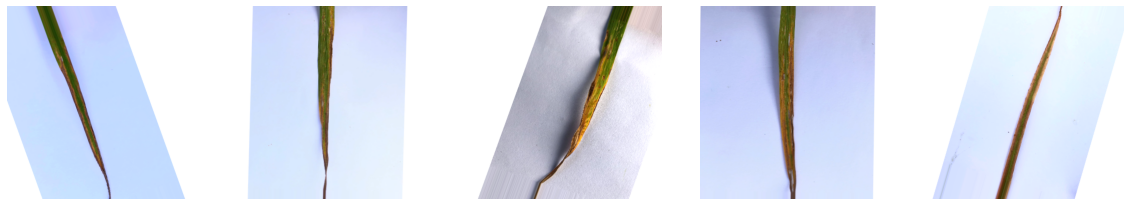


Blast


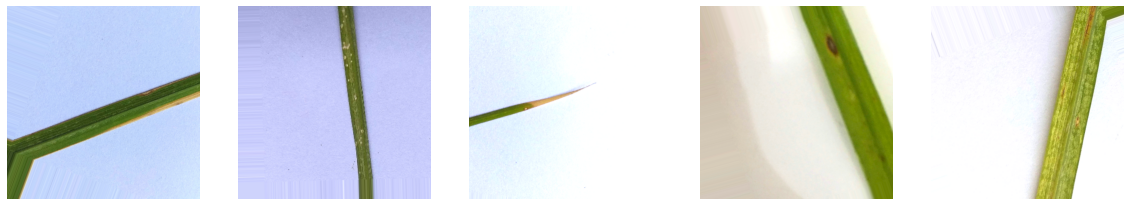


BrownSpot


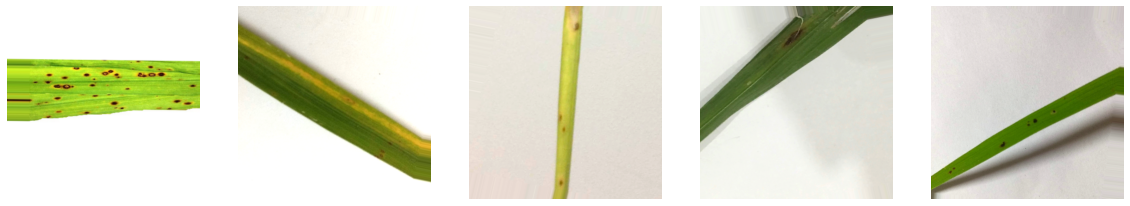


Healthy


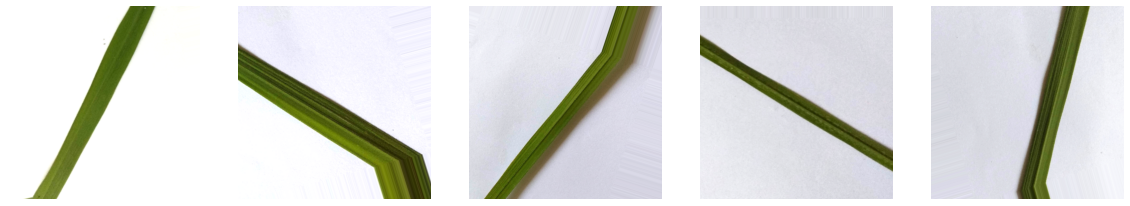


Hispa


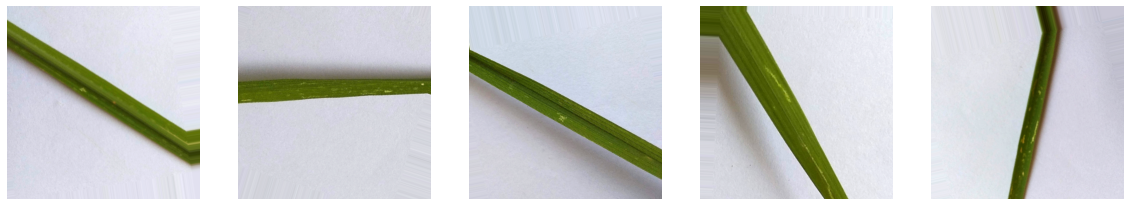

In [115]:
list_data_class = os.listdir(finaldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(finaldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# Data Modelling

prepare model save directory

In [116]:
saved_model_dir = "saved_model"
saved_model_his = "saved_model_history"
tflite_model_dir = "tflite_model"

if not(os.path.isdir(saved_model_dir)): os.mkdir(saved_model_dir)
if not(os.path.isdir(saved_model_his)): os.mkdir(saved_model_his)
if not(os.path.isdir(tflite_model_dir)): os.mkdir(tflite_model_dir)

load final data from drive

In [ ]:
shutil.rmtree('data/mixed/finaldata', ignore_errors=True)
# extract zip file
! unzip "/content/drive/Shareddrives/Tanamin Team/Machine Learning/datasets/rice/finaldata.zip" -d .

choosing the label
- LeafSmut : invalid
- BrownSpot : valid (Bercak Daun Cokelat)
- Blight : valid (Kresek/Hawar Daun)
- Blast : valid (blast)
- Tungro : valid (tungro)
- Hispa : invalid
- Healthy : valid (sehat)

In [118]:
ori_labels = ["LeafSmut", "BrownSpot", "Blight", "Blast", "Tungro", "Hispa", "Healthy"]
# delete label
delete_label = ["LeafSmut", "Hispa"]

if len(delete_label) > 0:
  for label in delete_label:
    shutil.rmtree(os.path.join('data/mixed/finaldata', label), ignore_errors=True)

## Init Method

In [119]:
# define my callbacks include (EarlyStopping, ModelCheckpoint)
def my_callbacks(filename):
  es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)
  mc = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

  return [mc]

In [120]:
# define method for showing plot learning curves
def plot_learning_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(6, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [121]:
# define confusion matrix method
def conf_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)

  ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

  ax.set_title('Confusion Matrix with labels\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(labels, rotation=45)
  ax.yaxis.set_ticklabels(labels, rotation=45)

  plt.show()

In [122]:
# define classification report method
def class_report(y_test, y_pred):
  print("Labels: ",train_generator.class_indices)
  print()
  print(classification_report(y_test, y_pred))

In [123]:
# save model method
def saved_model(modelname, model):
  export_path = os.path.join(saved_model_dir, modelname)
  if os.path.isdir(export_path):
    print('\nAlready saved a model, replace to new model\n')
    shutil.rmtree(export_path, ignore_errors=True)

  model.save(export_path)
  print("Export path: ", export_path)
  print(os.listdir(export_path))

# save model history method
def saved_model_history(modelname, history):
  with open(os.path.join(saved_model_his, modelname), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [124]:
# convert saved model to TFLite model
def tflite_model_convert(modelname, tflitedir):
  # Intialize the TFLite converter to load the SavedModel
  export_path = os.path.join(saved_model_dir, modelname)

  converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

  # Set the optimization strategy in the converter 
  converter.optimizations = [tf.lite.Optimize.DEFAULT]

  # Use the tool to finally convert the model
  tflite_model = converter.convert()

  # Write TFLite model
  tflite_dir = os.path.join(tflite_model_dir, tflitedir)

  if os.path.isdir(tflite_dir):
    print('\nAlready saved a model, replace to new model\n')
    shutil.rmtree(tflite_dir, ignore_errors=True)

  os.mkdir(tflite_dir)

  tflite_file = os.path.join(tflite_dir, "rice_{}.tflite".format(tflitedir.lower()))
  label_file = os.path.join(tflite_dir, "rice_{}.txt".format(tflitedir.lower()))

  with open(tflite_file, "wb") as f:
      f.write(tflite_model)

  with open(label_file, 'w') as f:
      f.write('\n'.join(labels))

  print("Export path: ", tflite_dir)
  print(os.listdir(tflite_dir))

## Preparing ImageDataGenerator

In [125]:
finaldata_dir = "data/mixed/finaldata"
img_dim = 224
img_shape = (224, 224, 3)

In [126]:
datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.2 
)

train_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size =(img_dim, img_dim),
    batch_size = 100,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size = (img_dim,img_dim),
    batch_size = 25,
    class_mode = 'categorical',
    subset='validation',
    shuffle=False
)

Found 4000 images belonging to 5 classes.
Found 999 images belonging to 5 classes.


In [127]:
train_generator.class_indices

{'Blast': 0, 'Blight': 1, 'BrownSpot': 2, 'Healthy': 3, 'Tungro': 4}

In [128]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)
num_labels = len(labels)

print("Labels: {}".format(labels))
print("Num labels: {}".format(num_labels))

Labels: ['Blast', 'Blight', 'BrownSpot', 'Healthy', 'Tungro']
Num labels: 5


## Model 1

In [130]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 26, 26, 64)      

In [131]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [132]:
# fitting model
history1 = model1.fit(
    train_generator,
    epochs = 25,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_OwnModel.h5"),
)

Epoch 1/25
40/40 [==============================] - ETA: 0s - loss: 1.4990 - accuracy: 0.3187
Epoch 1: val_accuracy improved from -inf to 0.42242, saving model to best_OwnModel.h5
40/40 [==============================] - 28s 682ms/step - loss: 1.4990 - accuracy: 0.3187 - val_loss: 1.2194 - val_accuracy: 0.4224
Epoch 2/25
40/40 [==============================] - ETA: 0s - loss: 1.0591 - accuracy: 0.5190
Epoch 2: val_accuracy improved from 0.42242 to 0.64364, saving model to best_OwnModel.h5
40/40 [==============================] - 27s 678ms/step - loss: 1.0591 - accuracy: 0.5190 - val_loss: 0.8203 - val_accuracy: 0.6436
Epoch 3/25
40/40 [==============================] - ETA: 0s - loss: 0.7993 - accuracy: 0.6488
Epoch 3: val_accuracy improved from 0.64364 to 0.67467, saving model to best_OwnModel.h5
40/40 [==============================] - 27s 671ms/step - loss: 0.7993 - accuracy: 0.6488 - val_loss: 0.7099 - val_accuracy: 0.6747
Epoch 4/25
40/40 [==============================] - ETA: 0

In [133]:
score_train = model1.evaluate(train_generator)
score_valid = model1.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

40/40 [==============================] - 5s 132ms/step - loss: 1.2012 - accuracy: 0.6967
Accuracy (train):  0.9727500081062317
Accuracy (test): 0.6966966986656189
Loss (train):  0.08837442845106125
Loss (test): 1.2011913061141968


### Plot Learning Curves

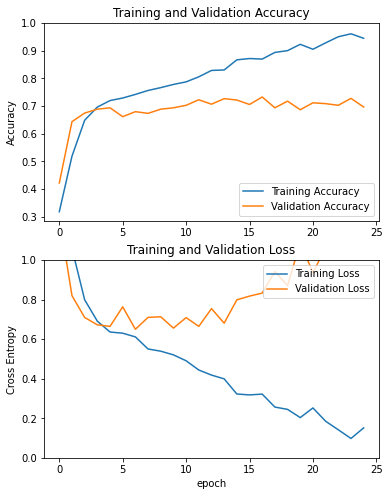

In [134]:
plot_learning_curves(history1)

### Confusion Matrix & Classification Report

In [135]:
y_test = validation_generator.classes
y_pred = model1.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


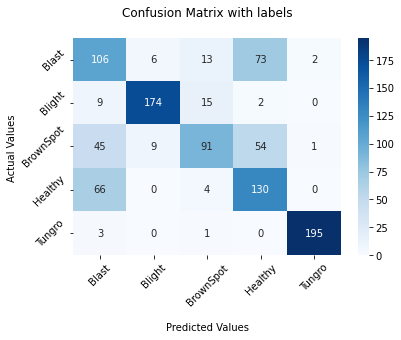

In [136]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [137]:
# show classification report
class_report(y_test, y_pred)

Labels:  {'Blast': 0, 'Blight': 1, 'BrownSpot': 2, 'Healthy': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.46      0.53      0.49       200
           1       0.92      0.87      0.89       200
           2       0.73      0.46      0.56       200
           3       0.50      0.65      0.57       200
           4       0.98      0.98      0.98       199

    accuracy                           0.70       999
   macro avg       0.72      0.70      0.70       999
weighted avg       0.72      0.70      0.70       999



### Save Model

In [138]:
# save model
modelname = "OwnModel"
saved_model(modelname, model1)

Export path:  saved_model/OwnModel
['keras_metadata.pb', 'saved_model.pb', 'variables', 'assets']


In [139]:
# save history as dict
saved_model_history(modelname, history1)

### Save Best Model (ModelCheckpoint)

In [140]:
best_model = tf.keras.models.load_model('best_OwnModel.h5')

In [141]:
modelname = "BestMC_OwnModel"
saved_model(modelname, best_model)

Export path:  saved_model/BestMC_OwnModel
['keras_metadata.pb', 'saved_model.pb', 'variables', 'assets']


In [142]:
# clear best model h5 format
os.remove('best_OwnModel.h5')

In [143]:
# shutil.move("/content/saved_model/BestMC_OwnModel", "/content/drive/Shareddrives/Tanamin Team/Machine Learning/models")

'/content/drive/Shareddrives/Tanamin Team/Machine Learning/models/BestMC_OwnModel'

### Save TFLite Model

In [ ]:
modelname = "BestMC_OwnModel"
tflitedir = "OwnModel"
tflite_model_convert(modelname, tflitedir)


Already saved a model, replace to new model

Export path:  tflite_model/OwnModel
['rice_ownmodel.tflite', 'rice_ownmodel.txt']


## Model 2

In [ ]:
from tensorflow.keras.applications import ResNet50    # underfit
from tensorflow.keras.applications import ResNet152V2 # overfit

model2 = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=img_shape)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

model2.layers[0].trainable = False

model2.summary()

234561536/234545216 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)             

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_ResNet152V2.h5")
)

Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 1.0562 - accuracy: 0.5955
Epoch 1: val_accuracy improved from -inf to 0.76700, saving model to best_ResNet152V2.h5
40/40 [==============================] - 51s 1s/step - loss: 1.0562 - accuracy: 0.5955 - val_loss: 0.6236 - val_accuracy: 0.7670
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 0.5894 - accuracy: 0.7825
Epoch 2: val_accuracy improved from 0.76700 to 0.81700, saving model to best_ResNet152V2.h5
40/40 [==============================] - 38s 957ms/step - loss: 0.5894 - accuracy: 0.7825 - val_loss: 0.4822 - val_accuracy: 0.8170
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.8133
Epoch 3: val_accuracy improved from 0.81700 to 0.88300, saving model to best_ResNet152V2.h5
40/40 [==============================] - 33s 822ms/step - loss: 0.4820 - accuracy: 0.8133 - val_loss: 0.3870 - val_accuracy: 0.8830
Epoch 4/100
40/40 [==============================

In [ ]:
score_train = model2.evaluate(train_generator)
score_valid = model2.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 6s 598ms/step - loss: 0.2531 - accuracy: 0.9150
Accuracy (train):  0.9865000247955322
Accuracy (test): 0.9150000214576721
Loss (train):  0.06876973807811737
Loss (test): 0.25307509303092957


### Plot Learning Curves

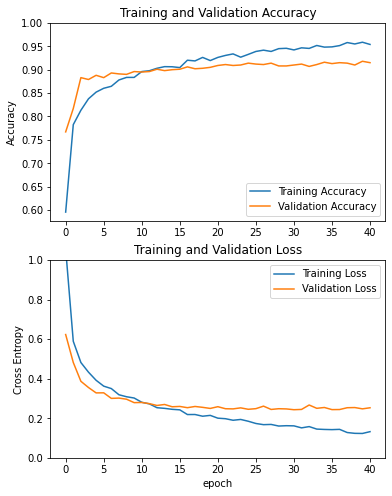

In [ ]:
plot_learning_curves(history2)

### Confusion Matrix & Classification Report

In [ ]:
y_test = validation_generator.classes
y_pred = model2.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


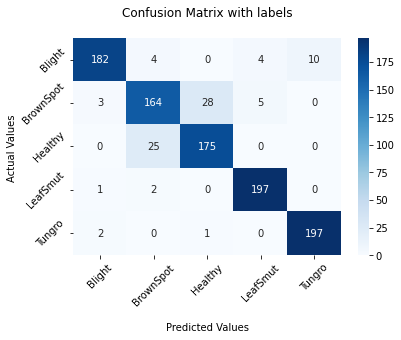

In [ ]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [ ]:
# show classification report
class_report(y_test, y_pred)

Labels:  {'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       200
           1       0.84      0.82      0.83       200
           2       0.86      0.88      0.87       200
           3       0.96      0.98      0.97       200
           4       0.95      0.98      0.97       200

    accuracy                           0.92      1000
   macro avg       0.91      0.92      0.91      1000
weighted avg       0.91      0.92      0.91      1000



### Save Model

In [ ]:
# save model
modelname = "ResNet152V2"
saved_model(modelname, model2)

INFO:tensorflow:Assets written to: saved_model/ResNet152V2/assets


INFO:tensorflow:Assets written to: saved_model/ResNet152V2/assets


Export path:  saved_model/ResNet152V2
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# save history as dict
saved_model_history(modelname, history2)

### Save Best Model (ModelCheckpoint)

In [ ]:
best_model = tf.keras.models.load_model('best_ResNet152V2.h5')

In [ ]:
modelname = "BestMC_ResNet152V2"
saved_model(modelname, best_model)

INFO:tensorflow:Assets written to: saved_model/BestMC_ResNet152V2/assets


INFO:tensorflow:Assets written to: saved_model/BestMC_ResNet152V2/assets


Export path:  saved_model/BestMC_ResNet152V2
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# clear best model h5 format
os.remove('best_ResNet152V2.h5')

### Save TFLite Model

In [ ]:
modelname = "BestMC_ResNet152V2"
tflitedir = "ResNet152V2"
tflite_model_convert(modelname, tflitedir)

Export path:  tflite_model/ResNet152V2
['rice_resnet152v2.txt', 'rice_resnet152v2.tflite']


## Model 3

In [41]:
from tensorflow.keras.applications.densenet import DenseNet121

model3 = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=img_shape),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                      

In [42]:
model3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [43]:
history3 = model3.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_DenseNet121.h5"),
)

Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 0.9889 - accuracy: 0.5930
Epoch 1: val_accuracy improved from -inf to 0.52452, saving model to best_DenseNet121.h5
40/40 [==============================] - 44s 782ms/step - loss: 0.9889 - accuracy: 0.5930 - val_loss: 1.1346 - val_accuracy: 0.5245
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 0.4009 - accuracy: 0.8555
Epoch 2: val_accuracy improved from 0.52452 to 0.66066, saving model to best_DenseNet121.h5
40/40 [==============================] - 28s 696ms/step - loss: 0.4009 - accuracy: 0.8555 - val_loss: 0.9643 - val_accuracy: 0.6607
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 0.2534 - accuracy: 0.9110
Epoch 3: val_accuracy improved from 0.66066 to 0.79880, saving model to best_DenseNet121.h5
40/40 [==============================] - 28s 683ms/step - loss: 0.2534 - accuracy: 0.9110 - val_loss: 0.5263 - val_accuracy: 0.7988
Epoch 4/100
40/40 [===========================

In [45]:
score_train = model3.evaluate(train_generator)
score_valid = model3.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

40/40 [==============================] - 5s 133ms/step - loss: 0.4572 - accuracy: 0.9109
Accuracy (train):  1.0
Accuracy (test): 0.9109109044075012
Loss (train):  0.0009774024365469813
Loss (test): 0.45717573165893555


### Plot Learning Curves

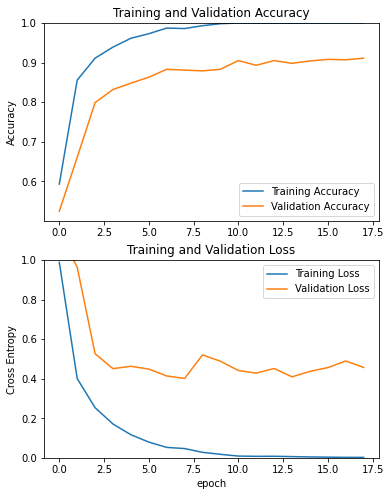

In [46]:
plot_learning_curves(history3)

### Confusion Matrix & Classification Report

In [47]:
y_test = validation_generator.classes
y_pred = model3.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


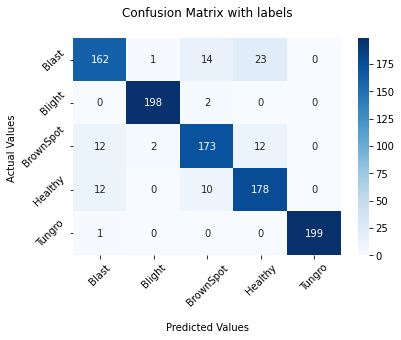

In [48]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [ ]:
# show classification report
class_report(y_test, y_pred)

Labels:  {'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.93      0.85      0.89       200
           2       0.89      0.94      0.91       200
           3       0.98      0.99      0.99       200
           4       0.99      0.99      0.99       200

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



### Save Model

In [ ]:
# save model
modelname = "DenseNet121"
saved_model(modelname, model3)

INFO:tensorflow:Assets written to: saved_model/DenseNet121/assets
Export path:  saved_model/DenseNet121
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# save history as dict
saved_model_history(modelname, history3)

### Save Best Model (ModelCheckpoint)

In [ ]:
best_model = tf.keras.models.load_model('best_DenseNet121.h5')

In [ ]:
modelname = "BestMC_DenseNet121"
saved_model(modelname, best_model)

INFO:tensorflow:Assets written to: saved_model/BestMC_DenseNet121/assets
Export path:  saved_model/BestMC_DenseNet121
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# clear best model h5 format
os.remove('best_DenseNet121.h5')

### Save TFLite Model

In [ ]:
modelname = "BestMC_DenseNet121"
tflitedir = "DenseNet121"
tflite_model_convert(modelname, tflitedir)

Export path:  tflite_model/DenseNet121
['rice_densenet121.tflite', 'rice_densenet121.txt']


## Model 4

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=img_shape,
                                include_top=False,
                                weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = True

pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(num_labels, activation='softmax')(x) 

model4 = tf.keras.Model(pre_trained_model.input, x)

model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_InceptionV3.h5"),
)

Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 1.1737 - accuracy: 0.5167
Epoch 1: val_accuracy improved from -inf to 0.73000, saving model to best_InceptionV3.h5
40/40 [==============================] - 62s 1s/step - loss: 1.1737 - accuracy: 0.5167 - val_loss: 0.7447 - val_accuracy: 0.7300
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 0.4580 - accuracy: 0.8223
Epoch 2: val_accuracy improved from 0.73000 to 0.87500, saving model to best_InceptionV3.h5
40/40 [==============================] - 38s 950ms/step - loss: 0.4580 - accuracy: 0.8223 - val_loss: 0.3557 - val_accuracy: 0.8750
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 0.2534 - accuracy: 0.9120
Epoch 3: val_accuracy improved from 0.87500 to 0.88400, saving model to best_InceptionV3.h5
40/40 [==============================] - 39s 973ms/step - loss: 0.2534 - accuracy: 0.9120 - val_loss: 0.2988 - val_accuracy: 0.8840
Epoch 4/100
40/40 [==============================

In [ ]:
score_train = model4.evaluate(train_generator)
score_valid = model4.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 6s 623ms/step - loss: 0.2510 - accuracy: 0.9540
Accuracy (train):  0.999750018119812
Accuracy (test): 0.9539999961853027
Loss (train):  0.0007916151662357152
Loss (test): 0.25095322728157043


### Plot Learning Curves

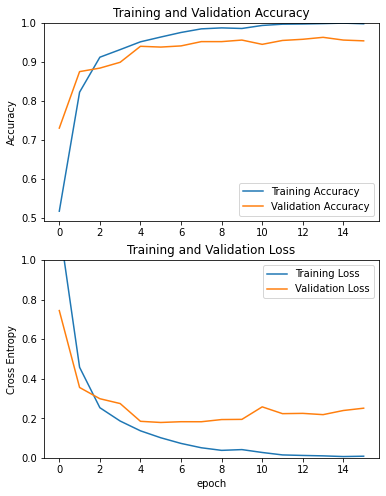

In [ ]:
plot_learning_curves(history4)

### Confusion Matrix & Classification Report

In [ ]:
y_test = validation_generator.classes
y_pred = model4.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


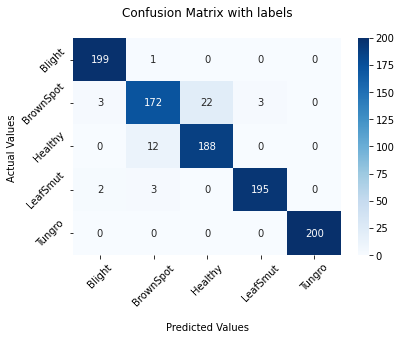

In [ ]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [ ]:
# show classification report
class_report(y_test, y_pred)

Labels:  {'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.91      0.86      0.89       200
           2       0.90      0.94      0.92       200
           3       0.98      0.97      0.98       200
           4       1.00      1.00      1.00       200

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



### Save Model

In [ ]:
# save model
modelname = "InceptionV3"
saved_model(modelname, model4)

INFO:tensorflow:Assets written to: saved_model/InceptionV3/assets
Export path:  saved_model/InceptionV3
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# save history as dict
saved_model_history(modelname, history4)

### Save Best Model (ModelCheckpoint)

In [ ]:
best_model = tf.keras.models.load_model('best_InceptionV3.h5')

In [ ]:
modelname = "BestMC_InceptionV3"
saved_model(modelname, best_model)

INFO:tensorflow:Assets written to: saved_model/BestMC_InceptionV3/assets
Export path:  saved_model/BestMC_InceptionV3
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# clear best model h5 format
os.remove('best_InceptionV3.h5')

### Save TFLite Model

In [ ]:
modelname = "BestMC_InceptionV3"
tflitedir = "InceptionV3"
tflite_model_convert(modelname, tflitedir)

Export path:  tflite_model/InceptionV3
['rice_inceptionv3.txt', 'rice_inceptionv3.tflite']


## Model 5

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 

model5 = tf.keras.models.Sequential([
    MobileNetV2(weights="imagenet", include_top=False, input_shape=img_shape),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

model5.layers[0].trainable = False

model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 1280)        0         
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1024)              1311744   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)              

In [ ]:
model5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_MobileNetV2.h5"),
)

Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 1.5367 - accuracy: 0.7648
Epoch 1: val_accuracy improved from -inf to 0.84400, saving model to best_MobileNetV2.h5
40/40 [==============================] - 37s 781ms/step - loss: 1.5367 - accuracy: 0.7648 - val_loss: 1.1437 - val_accuracy: 0.8440
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 1.0020 - accuracy: 0.8683
Epoch 2: val_accuracy improved from 0.84400 to 0.86000, saving model to best_MobileNetV2.h5
40/40 [==============================] - 31s 765ms/step - loss: 1.0020 - accuracy: 0.8683 - val_loss: 0.9134 - val_accuracy: 0.8600
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 0.8125 - accuracy: 0.8870
Epoch 3: val_accuracy improved from 0.86000 to 0.88900, saving model to best_MobileNetV2.h5
40/40 [==============================] - 31s 771ms/step - loss: 0.8125 - accuracy: 0.8870 - val_loss: 0.7665 - val_accuracy: 0.8890
Epoch 4/100
40/40 [===========================

In [ ]:
score_train = model5.evaluate(train_generator)
score_valid = model5.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 6s 622ms/step - loss: 0.4654 - accuracy: 0.9100
Accuracy (train):  0.9897500276565552
Accuracy (test): 0.9100000262260437
Loss (train):  0.18439586460590363
Loss (test): 0.4653778076171875


### Plot Learning Curves

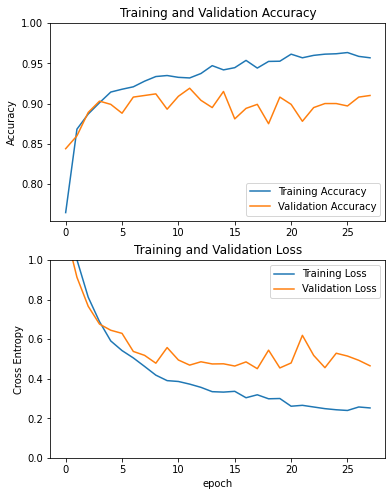

In [ ]:
plot_learning_curves(history5)

### Confusion Matrix & Classification Report

In [ ]:
y_test = validation_generator.classes
y_pred = model5.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


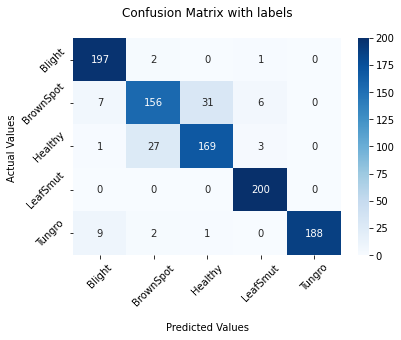

In [ ]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [ ]:
# show classification report
class_report(y_test, y_pred)

Labels:  {'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       200
           1       0.83      0.78      0.81       200
           2       0.84      0.84      0.84       200
           3       0.95      1.00      0.98       200
           4       1.00      0.94      0.97       200

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



### Save Model

In [ ]:
# save model
modelname = "MobileNetV2"
saved_model(modelname, model5)

INFO:tensorflow:Assets written to: saved_model/MobileNetV2/assets


INFO:tensorflow:Assets written to: saved_model/MobileNetV2/assets


Export path:  saved_model/MobileNetV2
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# save history as dict
saved_model_history(modelname, history5)

### Save Best Model (ModelCheckpoint)

In [ ]:
best_model = tf.keras.models.load_model('best_MobileNetV2.h5')

In [ ]:
modelname = "BestMC_MobileNetV2"
saved_model(modelname, best_model)

INFO:tensorflow:Assets written to: saved_model/BestMC_MobileNetV2/assets


INFO:tensorflow:Assets written to: saved_model/BestMC_MobileNetV2/assets


Export path:  saved_model/BestMC_MobileNetV2
['assets', 'variables', 'saved_model.pb', 'keras_metadata.pb']


In [ ]:
# clear best model h5 format
os.remove('best_MobileNetV2.h5')

### Save TFLite Model

In [ ]:
modelname = "BestMC_MobileNetV2"
tflitedir = "MobileNetV2"
tflite_model_convert(modelname, tflitedir)

Export path:  tflite_model/MobileNetV2
['rice_mobilenetv2.tflite', 'rice_mobilenetv2.txt']


## Download All Save Model

In [ ]:
# zip all model directory and download it
!zip -r all_models.zip saved_model

# zip all model history directory and download it
!zip -r all_models_history.zip saved_model_history

# zip all model directory and download it
!zip -r all_tflite_models.zip tflite_model

In [ ]:
try:
    files.download('all_models.zip')
    files.download('all_models_history.zip')
    files.download('all_tflite_models.zip')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# remove those file/folder (optional)
shutil.rmtree('saved_model', ignore_errors=True)
shutil.rmtree('saved_model_history', ignore_errors=True)
shutil.rmtree('tflite_model', ignore_errors=True)

# Choosing The Model

comparing accuracy history all model

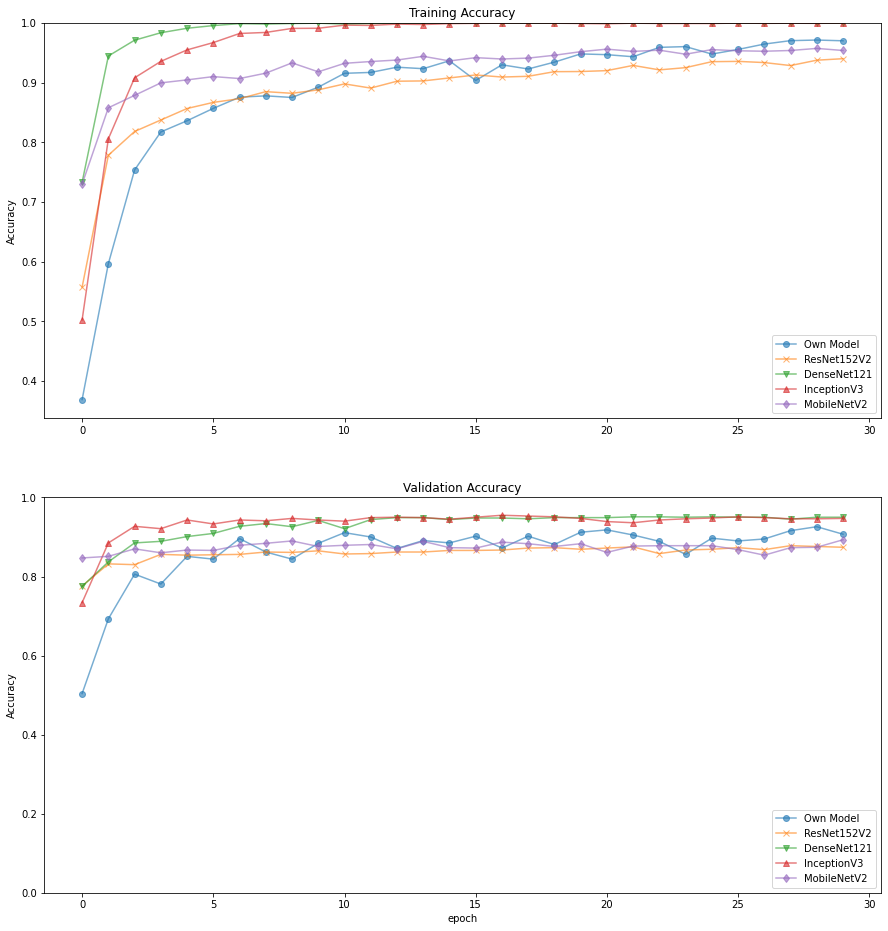

In [ ]:
acc1 = history1.history['accuracy']
acc2 = history2.history['accuracy']
acc3 = history3.history['accuracy']
acc4 = history4.history['accuracy']
acc5 = history5.history['accuracy']

val_acc1 = history1.history['val_accuracy']
val_acc2 = history2.history['val_accuracy']
val_acc3 = history3.history['val_accuracy']
val_acc4 = history4.history['val_accuracy']
val_acc5 = history5.history['val_accuracy']

plt.figure(figsize=(15, 16))
plt.subplot(2, 1, 1)
plt.plot(acc1, label='Own Model', marker='o', markersize=6, alpha=0.6)
plt.plot(acc2, label='ResNet152V2', marker='x', markersize=6, alpha=0.6)
plt.plot(acc3, label='DenseNet121', marker='v', markersize=6, alpha=0.6)
plt.plot(acc4, label='InceptionV3', marker='^', markersize=6, alpha=0.6)
plt.plot(acc5, label='MobileNetV2', marker='d', markersize=6, alpha=0.6)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(val_acc1, label='Own Model', marker='o', markersize=6, alpha=0.6)
plt.plot(val_acc2, label='ResNet152V2', marker='x', markersize=6, alpha=0.6)
plt.plot(val_acc3, label='DenseNet121', marker='v', markersize=6, alpha=0.6)
plt.plot(val_acc4, label='InceptionV3', marker='^', markersize=6, alpha=0.6)
plt.plot(val_acc5, label='MobileNetV2', marker='d', markersize=6, alpha=0.6)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])
plt.title('Validation Accuracy')
plt.xlabel('epoch')

plt.savefig('acc_all_model.png')

plt.show()

comparing loss history all model

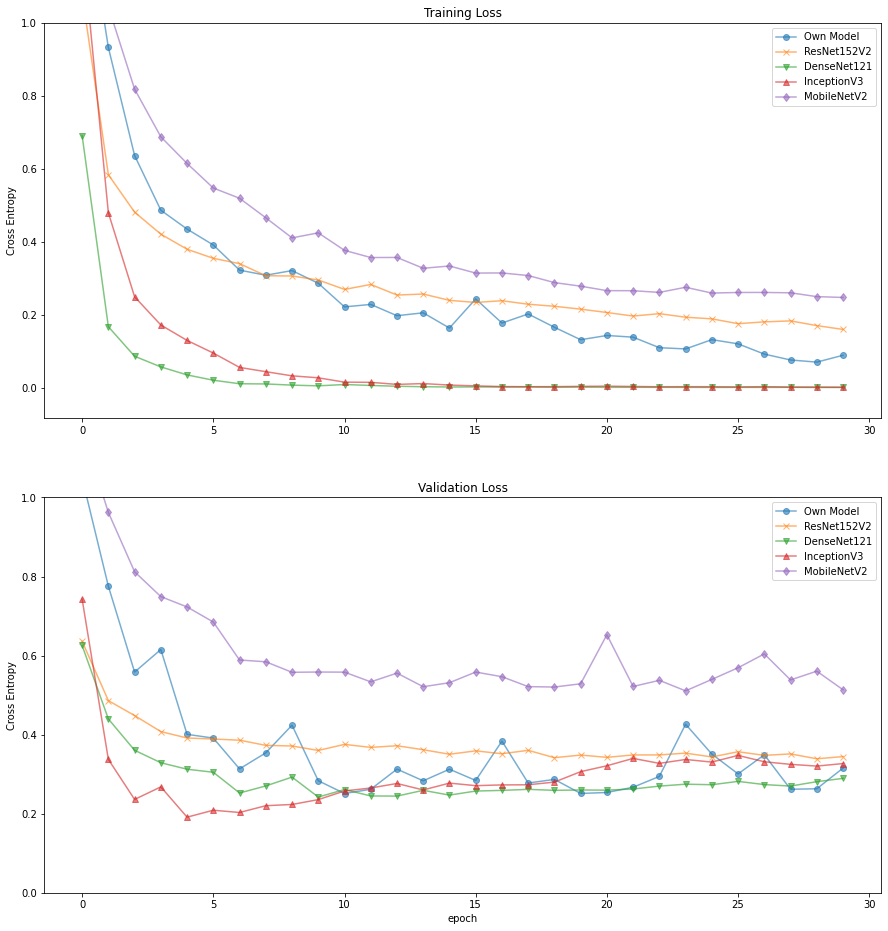

In [ ]:
loss1 = history1.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']
loss4 = history4.history['loss']
loss5 = history5.history['loss']

val_loss1 = history1.history['val_loss']
val_loss2 = history2.history['val_loss']
val_loss3 = history3.history['val_loss']
val_loss4 = history4.history['val_loss']
val_loss5 = history5.history['val_loss']

plt.figure(figsize=(15, 16))
plt.subplot(2, 1, 1)
plt.plot(loss1, label='Own Model', marker='o', markersize=6, alpha=0.6)
plt.plot(loss2, label='ResNet152V2', marker='x', markersize=6, alpha=0.6)
plt.plot(loss3, label='DenseNet121', marker='v', markersize=6, alpha=0.6)
plt.plot(loss4, label='InceptionV3', marker='^', markersize=6, alpha=0.6)
plt.plot(loss5, label='MobileNetV2', marker='d', markersize=6, alpha=0.6)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Loss')

plt.subplot(2, 1, 2)
plt.plot(val_loss1, label='Own Model', marker='o', markersize=6, alpha=0.6)
plt.plot(val_loss2, label='ResNet152V2', marker='x', markersize=6, alpha=0.6)
plt.plot(val_loss3, label='DenseNet121', marker='v', markersize=6, alpha=0.6)
plt.plot(val_loss4, label='InceptionV3', marker='^', markersize=6, alpha=0.6)
plt.plot(val_loss5, label='MobileNetV2', marker='d', markersize=6, alpha=0.6)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Validation Loss')
plt.xlabel('epoch')

plt.savefig('loss_all_model.png')

plt.show()

## Load Saved Model

In [ ]:
# extract zip file
! unzip "drive/MyDrive/Colab Notebooks/res/saved_model.zip" -d .

In [ ]:
list_modelnames = ["OwnModel", "ResNet152V2", "DenseNet121", "InceptionV3", "MobileNetV2"]
dict_models = {}

# load model into new variable
for modelname in list_modelnames:
  dict_models[modelname] = tf.keras.models.load_model('saved_model/BestMC_{}'.format(modelname))

dict_models.keys()

dict_keys(['OwnModel', 'ResNet152V2', 'DenseNet121', 'InceptionV3', 'MobileNetV2'])

## Evaluate All Best Model

In [ ]:
# evaluate all model
dict_score_train = {}
dict_score_valid = {}

for modelname in list_modelnames:
  dict_score_train[modelname] = dict_models[modelname].evaluate(train_generator)
  dict_score_valid[modelname] = dict_models[modelname].evaluate(validation_generator)

10/10 [==============================] - 5s 545ms/step - loss: 0.4689 - accuracy: 0.9190


## Plot Comparison All Best Model

In [ ]:
# prepare data before plot
df1 = pd.DataFrame({
    'Model': list_modelnames,
    'Train': [eval[1] for eval in dict_score_train.values()],
    'Valid': [eval[1] for eval in dict_score_valid.values()],
})

df2 = pd.DataFrame({
    'Model': list_modelnames,
    'Train': [eval[0] for eval in dict_score_train.values()],
    'Valid': [eval[0] for eval in dict_score_valid.values()],
})

tidy1 = df1.melt(id_vars='Model').rename(columns=str.title)

tidy2 = df2.melt(id_vars='Model').rename(columns=str.title)

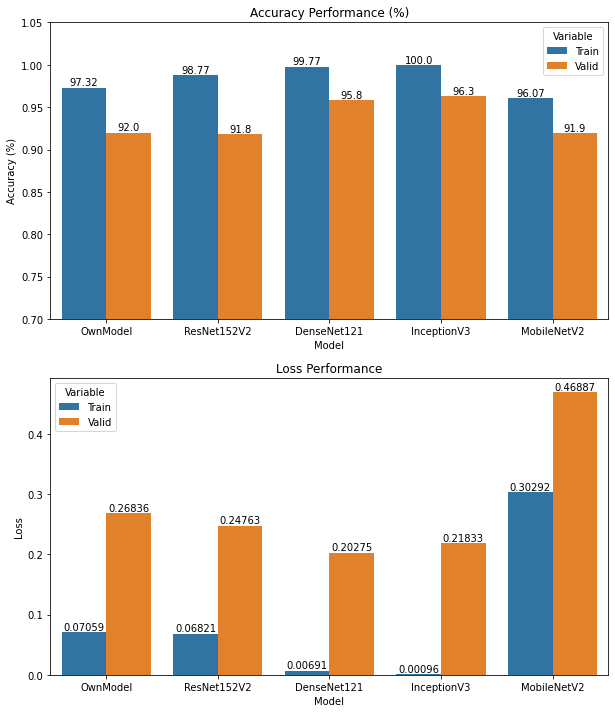

In [ ]:
# plot comparison all models evaluate
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# first plot
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy1, ax=ax1)
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim([0.7 ,1.05])
ax1.set_title('Accuracy Performance (%)')

for p, data in zip(ax1.patches, tidy1['Value']):
    ax1.annotate(round(data*100, 2), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

# second plot
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy2, ax=ax2)
ax2.set_ylabel('Loss')
ax2.set_title('Loss Performance')

for p, data in zip(ax2.patches, tidy2['Value']):
    ax2.annotate(round(data, 5), xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.savefig('evaluate_all_model.png')
plt.show()

## Conclusion

**DenseNet121 Model** has high accuracy and lower loss also the model is not too complex, it will be used for Rice Leaf Disease Prediction feature

# Predict Model with User Image Input

In [ ]:
best_model = tf.keras.models.load_model('saved_model/BestMC_DenseNet121')

Saving _0_3113.png to _0_3113.png

Predict:
BrownSpot

Probablity:
Blight : 0.00%
BrownSpot : 100.00%
Healthy : 0.00%
LeafSmut : 0.00%
Tungro : 0.00%


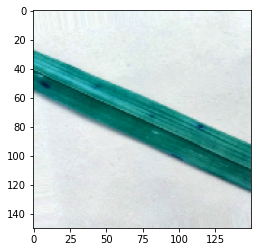

In [ ]:
# get user image input
labels = ['Blight', 'BrownSpot', 'Healthy', 'LeafSmut', 'Tungro']

uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  images /= 255

  classes = best_model.predict(images, batch_size=32)
  predicted_class_indices=np.argmax(classes)


print("\nPredict:")
if predicted_class_indices == 0:
  print('Blight')
elif predicted_class_indices == 1:
  print('BrownSpot')
elif predicted_class_indices == 2:
  print('Healthy')
elif predicted_class_indices == 3:
  print('LeafSmut')
elif predicted_class_indices == 4:
  print('Tungro')

print("\nProbablity:")
for idx, val in enumerate(labels):
  print("{} : {:.2f}%".format(val, classes[0][idx] * 100))

# Deployment TensorFlow Lite

## Download Pre-saved TFLite Models

In [ ]:
# extract zip file
! unzip "drive/MyDrive/Colab Notebooks/res/tflite_model.zip" -d .

In [ ]:
tflite_model_file = "tflite_model/DenseNet121/rice_densenet121.tflite"

## Test the TFLite Model Using the Python Interpreter

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
test_generator = validation_generator

In [ ]:
# Gather results for the randomly sampled test images
predictions = []
test_labels, test_imgs = [], []

for i in range(10):
  imgs, labels = test_generator.next()

  for idx in range(2):
    img_tensor = np.expand_dims(imgs[idx], axis=0)
    interpreter.set_tensor(input_index, img_tensor)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    test_labels.append(labels[idx])
    test_imgs.append(imgs[idx])

In [ ]:
# Utilities for plotting

class_names = ['Blight', 'BrownSpot', 'Healthy', 'LeafSmut', 'Tungro']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

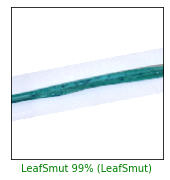

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 15 #@param {type:"slider", min:0, max:19, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_imgs)
plt.show()